# OpenCVとPythonで始める画像処理


## 概要
http://postd.cc/image-processing-101/
- 画像処理：特定の効果（例えばグレースケール画像）をもたらすために画像を加工したり，操作したりすること．また，コンピュータを使って，画像から情報を取り出したりすること．
- コンピュータビジョンとも深く関係しており，これらの境界線はとても曖昧．
- 画像を加工する方法やこれらの方法を使って，いかに画像情報を集めることができるかを学ぶ．
- 数学を怖がらない．疑似コードを読めば理論が理解できるはず．

## 要約
- 一般的な前処理：画像をグレースケールに変換し， そこにガウスぼかしを適応して単純化とノイズ除去を行う

In [2]:
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# 画像の読み込み
img = cv2.imread('../dataset/image/noguchi02.jpg')

# 画像の表示． OpenCVでは，画像は"BGR"フォーマットで読み込まれる設定になっている．
print(img) # (600, 800, 3)

[[[ 72  99 143]
  [ 76 103 147]
  [ 78 106 147]
  ..., 
  [159 186 207]
  [160 187 213]
  [157 187 212]]

 [[ 74 101 145]
  [ 77 104 148]
  [ 77 105 146]
  ..., 
  [160 187 208]
  [158 186 210]
  [153 183 208]]

 [[ 76 103 147]
  [ 77 104 148]
  [ 76 104 145]
  ..., 
  [157 181 203]
  [160 188 212]
  [158 186 210]]

 ..., 
 [[ 39  78 130]
  [ 39  78 130]
  [ 40  79 131]
  ..., 
  [193 210 223]
  [195 212 225]
  [197 214 227]]

 [[ 32  71 123]
  [ 32  71 123]
  [ 32  71 123]
  ..., 
  [198 215 228]
  [200 217 230]
  [200 217 230]]

 [[ 39  78 130]
  [ 39  78 130]
  [ 39  78 130]
  ..., 
  [199 216 229]
  [200 217 230]
  [201 218 231]]]


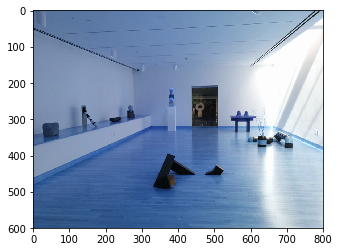

In [4]:
#  Matplotlibは"RGB"で読み込まれるため， そのまま表示すると赤と青が入れ替わっている
plt.imshow(img)

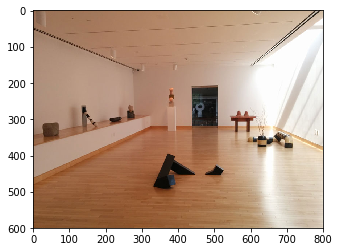

In [5]:
# matplotlibで正しく表示するため，BGRからRGBに変換．
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert
plt.imshow(img)

## カラーモデル
**RBG**
- 各色はチャンネルと呼ばれる
- ほとんどのシステムではRGB値は0から255の領域で表現され，数値が高いほhど明度は高い．  

**HSV**
- 色相(Hue)：虹色のカラーチャーとのどの領域に位置するか
- 彩度(Saturation)：色の鮮やかさ
- 明度(Value)：明るさ．どの程度光が取り入れられているか
- いずれかの色チャンネルの一つで，画像の色を考える際に役立つ．例えば画像の中で，青い色相の領域に同調する部分を探すのに適す．  

**HSL**
- HSVの変化形．HSVによく似ているが，彩度と3つ目のチャンネル(明度 対 輝度)の定義が異なる．　　

**グレースケール**
- 1つの色チャンネルしか持たない．
- 0：黒, 255：白．明るさ度合いを表す．


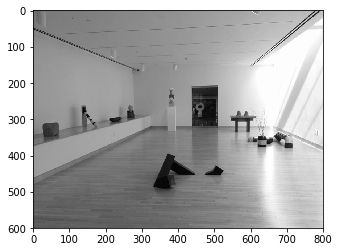

In [12]:
# グレースケールに変換． original→ GRAY → RGBでグレースケール画像の表示が可能に．
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# *バッチ処理のサンプルは以下
# self.x_train = self.x_train.reshape(self.x_train.shape[0], -1)
plt.imshow(gray_img, cmap="gray")

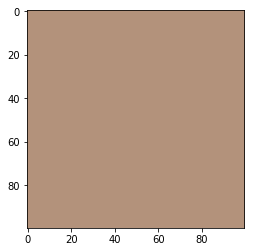

In [6]:
# 画像の平均色を割り出す
average_color_per_row = np.average(img, axis=0) # (800, 3)
average_color = np.average(average_color_per_row, axis=0) # (3,)

# uint8に変換
average_color = np.uint8(average_color) # [179, 146, 123]

# 100 x 100で表示
average_color_img = np.array([[average_color]*100]*100, np.uint8)
plt.imshow(average_color_img)

## セグメンテーション
- 画像情報を集める際，興味のある特徴ごとに分割する必要があり，これをセグメンテーションという
- 分析を容易にすることを目的に，意味を持たせる．
- もっとも簡単な方法は**閾値処理**． 通常は白と黒の2値画像(シングルチャンネル画像)に変換．

(600, 800)

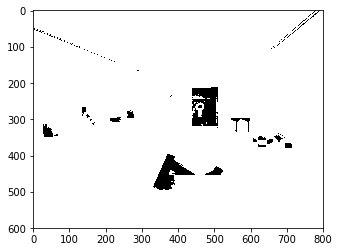

In [13]:
# 閾値60
_, threshold_img = cv2.threshold(gray_img, 60, 255, cv2.THRESH_BINARY) # threshold： 閾値

# 画像の表示
plt.imshow(threshold_img, cmap="gray")

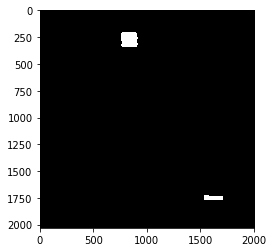

In [8]:
# 閾値よりも低い値を探さなくても，cv2.inRange()を使えば，一定の色相の領域内の部分を画像から見つけられる．
piet = cv2.imread("images/piet.png")
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV) # HSVに変換．

# HSVにおけるHue(色相)の青の範囲 青：(B, G, R) = (255, 0, 0)
blue_min = np.array([100, 100, 100], np.uint8)
blue_max = np.array([140, 255, 255], np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_blue_img)

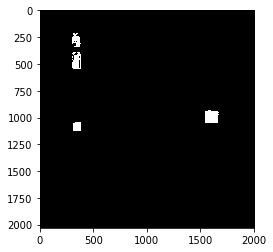

In [9]:
# 赤の範囲 # (B, G, R) = (0, 0, 255) 
red_min = np.array([120, 120, 180], np.uint8)
red_max = np.array([255, 255, 255], np.uint8)
threshold_red_img = cv2.inRange(piet_hsv, red_min, red_max)

threshold_red_img = cv2.cvtColor(threshold_red_img, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_red_img)

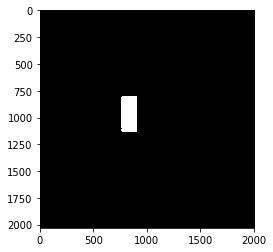

In [10]:
# 黄色の範囲 # 黄色は(B, G, R) = (0, 255, 255) 
yellow_min = np.array([20, 150, 150], np.uint8)
yellow_max = np.array([25, 255, 255], np.uint8)
threshold_yellow_img = cv2.inRange(piet_hsv, yellow_min, yellow_max)

threshold_yellow_img = cv2.cvtColor(threshold_yellow_img, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_yellow_img)

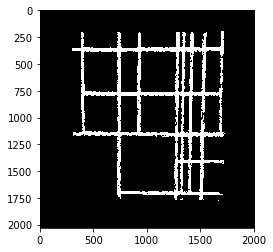

In [11]:
# 黒の範囲 # (B, G, R) = (0, 0, 0) 
black_min = np.array([0, 0, 0], np.uint8)
black_max = np.array([150, 150, 100], np.uint8)
threshold_black_img = cv2.inRange(piet_hsv, black_min, black_max)

threshold_black_img = cv2.cvtColor(threshold_black_img, cv2.COLOR_GRAY2RGB)

plt.imshow(threshold_black_img)

## 2値化閾値を使ったマスキング
- マスク：ビット演算で使われるゼロとゼロ以外の値の行列のこと．
- 画像を切ったりマスクで隠したりできる．
- マスクは通常，ゼロの行列(消したい部分)とゼロ以外の行列(残したい部分)

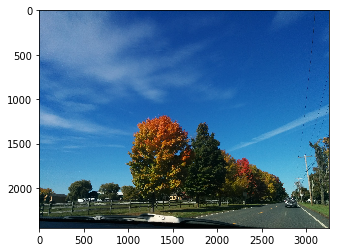

In [12]:
# 元画像の表示． 空を消したい．
upstate = cv2.imread('images/upstate-ny.jpg')
upstate_hsv = cv2.cvtColor(upstate, cv2.COLOR_BGR2HSV) # BRG → HSV # あとから使うから．
plt.imshow(cv2.cvtColor(upstate_hsv, cv2.COLOR_HSV2RGB)) # HSV → RGB
plt.imshow(cv2.cvtColor(upstate, cv2.COLOR_BGR2RGB)) # BGR → RGB

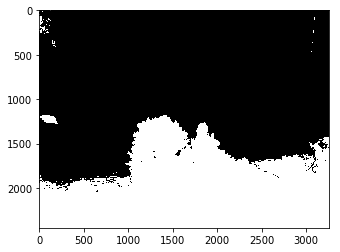

In [13]:
# 空を抽出． 取り除きたい部分なのでmask_inverseとしている．
mask_inverse = cv2.inRange(upstate_hsv, blue_min, blue_max)

# bitwise_notで値を逆にすることで， 空以外の部分を抽出
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)) # カラーモードを変えないと黄と紫に．

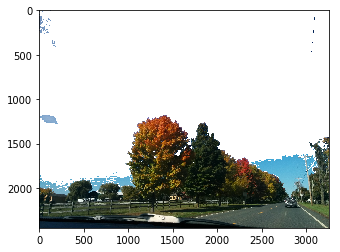

In [14]:
# maskを3チャンネルに変換
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# maskを適応
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# 切り捨てられた部分を白で置き換える． (src1, alpha, src2, beta, gammma)
# alpha - weight of the first array elements
# beta - weight of the second array elements
# gamma – scalar added to each sum.
masked_replace_white = cv2.addWeighted(masked_upstate, 1, cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

## ぼかし(blurring)
- ノイズ：セグメント分けの邪魔になる， 小さい変則的な要素．
- ガウスぼかしを使うことで画像の前処理を行うことがよくある．
- ぼかしは明度差の大きい場合や， ピクセル間で激しい変化がある場合にそれらをスムーズにするもの．  

- ガウスぼかしは， 正方形のカーネルでたたみ込んで， 画像内の各ピクセルを変換することで効果を出す．
- カーネルによって操作が決まる．
- 5x5のカーネルを適応すると，全てのピクセルに対して周りの5x5のピクセルが考慮され， 平均値をだす
- ガウシアンカーネルサイズが大きいほどぼかしは強くなる．
- 画像にノイズが多く，閾値を適応する前に全ての変則的な要素をスムーズにしたい場合に特に有効．
- ぼかしたほうが，閾値の適応される塊のラインが明確になり，使いやすくなる．

1 x 1


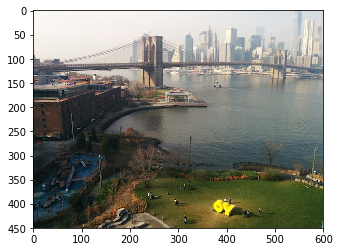

5 x 5


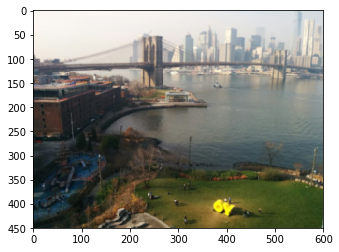

15 x 15


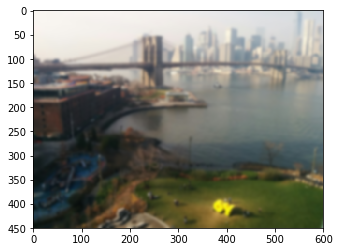

In [15]:
img = cv2.imread("images/oy.jpg")

# 3つのカーネルサイズによるガウスぼかしの比較．
sizes = [1, 5, 15] # 1：元画像
for size in sizes:
    img_blur_small = cv2.GaussianBlur(img, (size, size), 0)
    img_blur_small = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB)
    print("{} x {}".format(size, size))
    plt.imshow(img_blur_small)
    plt.show()

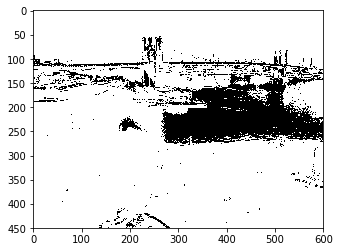

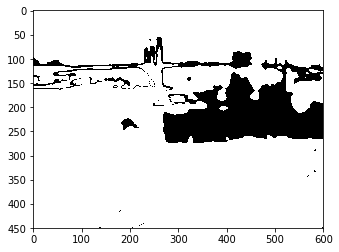

In [16]:
for image in [img, img_blur_small]:
    # 取り除く部分
    mask_inverse = cv2.inRange(image, blue_min, blue_max)

    # bitwise_notで値を逆にすることで， 取り出したい部分を抽出
    mask = cv2.bitwise_not(mask_inverse)
    plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)) # カラーモードを変えないと黄と紫に．
    plt.show()

## 輪郭と外接矩形
- 特徴でセグメンとし，個々のコインを区別することを考える．
- 一般的な前処理：画像をグレースケールに変換し， そこにガウスぼかしを適応して単純化とノイズ除去を行う
- 前処理を行った画像に二値化閾値処理を適応．  

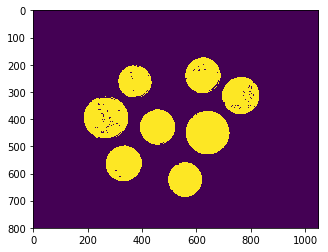

In [17]:
# グレースケールに変換し，　ガウスぼかしを適応
coins = cv2.imread('images/coins.jpg')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (5, 5), 0) # 3つめの引数は標準偏差

# 2値化閾値処理
_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255, cv2.THRESH_BINARY) # 1つ目の返り値は閾値
 
# コインの方を白くする．
coins_binary = cv2.bitwise_not(coins_binary)

# RGBにもどすことで白黒に．
# coins_binary = cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB)

# 表示
plt.imshow(coins_binary)

## 輪郭の検出
- 輪郭：境界線上で同じ色や明度を持つ全ての連続する点を繋いだ曲線のこと．
- 形状の分析だけでなく，物体や特徴の検出をする際にも便利．
- cv2.findContours()を使うと，それぞれのコインの輪郭を検出できる．
- これをcv2.RETR_EXTERNALフラグの中で関数に渡すと，外郭だけが返される．
- この外郭によってそれぞれのエリアを検出できるので，コインより小さなものをフィルタで取り除ける．
- 輪郭エリアを得るためには，cv2.countourArea()を使用．

number of coins: 8


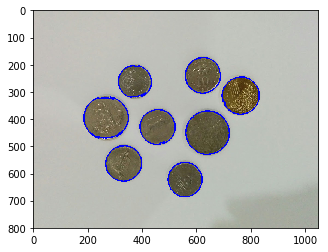

In [18]:
# 輪郭(conter)の発見． 
_, coins_contours, _ = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# イメージのコピーを作成
coins_and_contours = np.copy(coins)

# 十分に大きいエリアから輪郭を発見
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

# 輪郭を描写． drawContours(入力画像， listに保存されている輪郭， 描画したい輪郭のインデックス， 色や線の太さ)
contour = cv2.drawContours(coins_and_contours, large_contours, -1, (255, 0, 0), 3)
contour = cv2.cvtColor(contour, cv2.COLOR_BGR2RGB)
plt.imshow(contour)

print("number of coins: %d"%len(large_contours))

## 外接矩形の検出
- 輪郭を含むことができるもっとも小さな長方形．
- 画像から個々のコインをセグメントわけするのに使うことができる
- cv2.boundingRect()メソッドでは，長方形の左上の角のx座標とy座標，及び幅と高さの値を外接矩形として返す
- 8枚のコインを個別に取り出すために，外接矩形を使うこともできる．

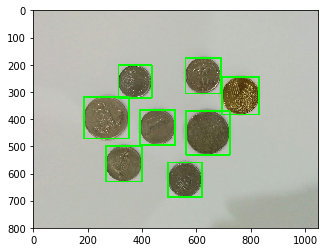

In [19]:
# 矩形画像を作るために画像をコピー
bounding_img = np.copy(coins)

for contour in large_contours:
    x, y, w, h = cv2.boundingRect(contour)
    img = cv2.rectangle(bounding_img, (x, y), (x+w, y+h), (0, 255, 0), 5)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

## エッジ検出
- 境界を見つけ出す方法．多色使いのの物体のセグメンテーションにも使える．
- エッジ：画像において輝度や明度が変化している部分の，点の集まり
- エッジ検出は画像処理の基本的な要素であり，特徴検出や特徴処理をする際に，まずここからはじめることが多い
- エッジ検出にはちょっとした計算が必要だが，今回はあまり触れない．
- エッジ検出の背景にある基本的な考え方：画像内の輝度の変化(勾配)の大きさと方向は測定可能．
- 点が集まっている箇所の勾配が閾値を超えた時，それが境界であると考えられる  


- キャニー法のアルゴリズム：一般的なエッジ検出アルゴリズムで，正確で鮮明なエッジを検出できる．

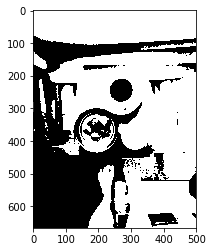

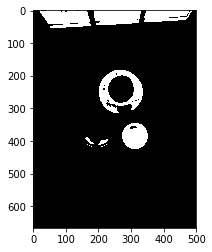

In [29]:
# 閾値処理による2値化
cups = cv2.imread("images/cups.jpg")

# ガウスぼかしとグレースケールの適応． 
cups_preprocessed = cv2.cvtColor(cv2.GaussianBlur(cups, (7,7), 0), cv2.COLOR_BGR2GRAY)

# 2値化
# 不均一な証明下にある画像であるため， 単純な閾値処理でボウルとカップの両方を捉えることはできない．
for thresh in [80, 200]:
    _, cups_thresh = cv2.threshold(cups_preprocessed, thresh, 255, cv2.THRESH_BINARY)
    plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))
    plt.show()

## キャニー法  
- 2つの閾値をとる「二重の閾値」．
- 勾配の大きさがthreshold2よりも大きい場合は強い境界と判断される  
- threshold2未満threshold1以上の弱い境界は，他の強い境界に接して いれば境界と考えられる．  
- キャニー法を使うと，単純な閾値処理では検出できないような画像の特徴を抽出する際により良い結果が得られる．  
- 対象となる物体が線や縁などの標準的な携帯であれば，ハフ変換を利用して検出できる  

True

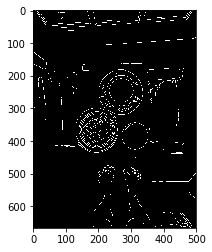

In [30]:
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2 =110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))
cv2.imwrite("cups-edges.jpg", cups_edges)

##  直線検出
- 複数の点を通る，直線の可能性のある線の候補をあげることによって処理を行う．
- 各線はrとthetaの極座標の観点から， r = x * cos (theta) + y * sin (theta)と定義される(r^2 = x^2 + y^2となる)
- 直線の可能性があるものが，ほかにも十分な数の点を通っていれば直線だと考えられる．

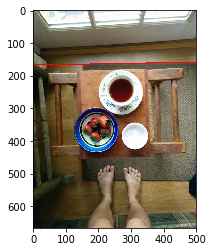

In [41]:
cups_lines = np.copy(cups)

# ハフ直線の検出． (入力画像， rの精度， θの精度, 点の最小数)
num_pix_threshold = 110 # 直線となるために必要な最小の点の数．
lines = cv2.HoughLines(cups_edges, 1, np.pi/180, num_pix_threshold) 
 
for rho, theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 =b*rho
    
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    img = cv2.line(cups_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

## 円検出
- ( x - a ) ^ 2 + ( y - b ) ^ 2 = r ^ 2の候補の要素となるa, b, rの全ての値を求める
- 検索範囲が非常に広いので， 範囲を限定するために理想的な境界を設定する必要あり(例：最小or最大の半径値)

number of circles detected: 3


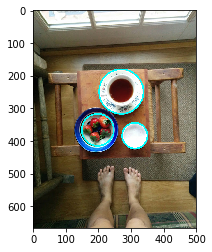

In [56]:
# ハフ円の検出
# 縁と縁の距離minDistが最低50は必要なので， 検出された円は1つだけ．
circles = cv2.HoughCircles(cups_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
cups_circles = np.copy(cups)

# 円が見つかったら描画
if circles is not None and len(circles) > 0:
    circles = circles[0]
    for (x, y, r) in circles:
        x, y, r = int(x), int(y), int(r)
        cv2.circle(cups_circles, (x, y), r, (255, 255, 0), 4)
        plt.imshow(cv2.cvtColor(cups_circles, cv2.COLOR_BGR2RGB))
        
print('number of circles detected: %d' % len(circles[0]))